In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import librosa




ts,sample_rate= librosa.load("CantinaBand3.wav",sr=None)
length_ts_sec=librosa.get_duration(filename="CantinaBand3.wav")

print(f"sample_rate:{sample_rate}")
print(f"length_ts_sec{length_ts_sec}")

sample_rate:22050
length_ts_sec3.0


In [2]:


from IPython.display import Audio
Audio(ts, rate=sample_rate)

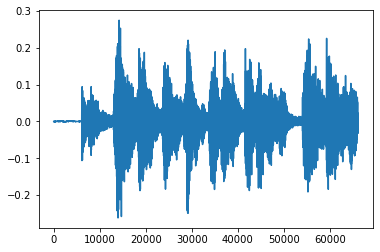

In [3]:


plt.plot(ts)



dft formula 

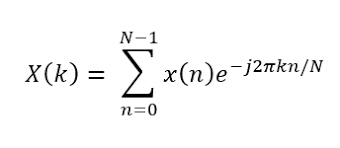

In [4]:
def get_dft(Xs,n):
    '''
    calculate Discrete Fourier Transform (DFT)
    '''
    L  = len(Xs)
    ks = np.arange(0,L,1)
    xn = np.sum(Xs*np.exp((1j*2*np.pi*ks*n)/L))/L
    return(xn)




The Nyquist limit always equals Pulse Repetition Frequency (PRF)/2. 

In [5]:
def get_signal_dft(ts):
    '''
    Compute Fourier coefficients 
    '''
    mag = []
    L = len(ts)
    for n in range(int(L/2)): # Nyquest Limit
        mag.append(np.abs(get_dft(ts,n))*2) #absolute value of each Fourier coefficient
    return(mag)


<img  src="hz_formula.png">

In [6]:
def get_Hz_scale_vec(ks,sample_rate,Npoints):
    freq_Hz = ks*sample_rate/Npoints
    freq_Hz  = [int(i) for i in freq_Hz ] 
    return(freq_Hz )

If we perform DFT on subwindow of the original time series 
and slide down the subwindow across the signal,
then we can obtain the time-dependent Fourier coefficients.

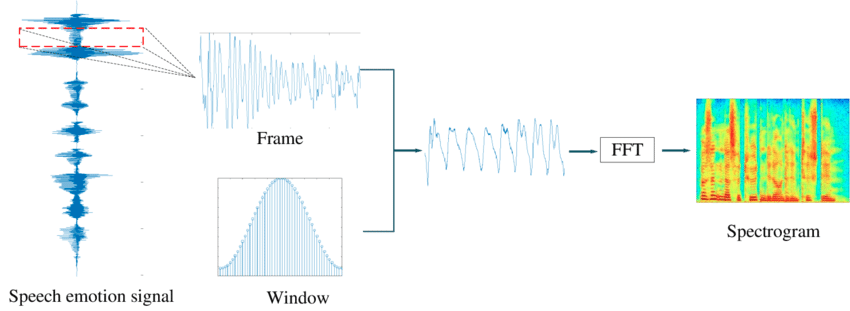

In [7]:
def create_spectrogram(ts,NFFT,noverlap = None):
    '''
          ts: original time series
        NFFT: The number of data points used in each block for the DFT.
          Fs: the number of points sampled per second, so called sample_rate
    noverlap: The number of points of overlap between blocks. The default value is 128. 
    '''
    if noverlap is None:
        noverlap = NFFT/2
    noverlap = int(noverlap)
    starts  = np.arange(0,len(ts),NFFT-noverlap,dtype=int)
    # remove any window with less than NFFT sample size
    starts  = starts[starts + NFFT < len(ts)]
    xns = []
    for start in starts:
        # short term discrete fourier transform
        ts_window = get_signal_dft(ts[start:start + NFFT]) 
        xns.append(ts_window)
    specX = np.array(xns).T
    # rescale the absolute value of the spectrogram as rescaling is standard
    spec = 10*np.log10(specX)
    assert spec.shape[1] == len(starts) 
    return(starts,spec)



In [8]:
L = 256
noverlap = 84
Nxlim= 10
mag = get_signal_dft(ts)
starts, spec = create_spectrogram(ts,L,noverlap = noverlap )
ks   = np.linspace(0,len(mag),Nxlim)
ksHz = get_Hz_scale_vec(ks,sample_rate,len(ts))


In [13]:
def plot_spectrogram(spec,ks,sample_rate, L, starts, mappable = None):
    plt.figure(figsize=(20,8))
    plt_spec = plt.imshow(spec,origin='lower')
    
    Nyticks = 10
    ks      = np.linspace(0,spec.shape[0],Nyticks)
    ksHz    = get_Hz_scale_vec(ks,sample_rate,len(ts))
    plt.yticks(ks,ksHz)
    plt.ylabel("Frequency (Hz)")

    ## create xlim
    Nxticks = 10
    ts_spec = np.linspace(0,spec.shape[1],Nxticks)
    ts_spec_sec  = ["{:4.2f}".format(i) for i in np.linspace(0,length_ts_sec*starts[-1]/len(ts),Nxticks)]
    plt.xticks(ts_spec,ts_spec_sec)
    plt.xlabel("Time (sec)")
    plt.savefig("")
    plt.show("spectrogram.png")
    return(plt_spec)




smaller value -> darker 

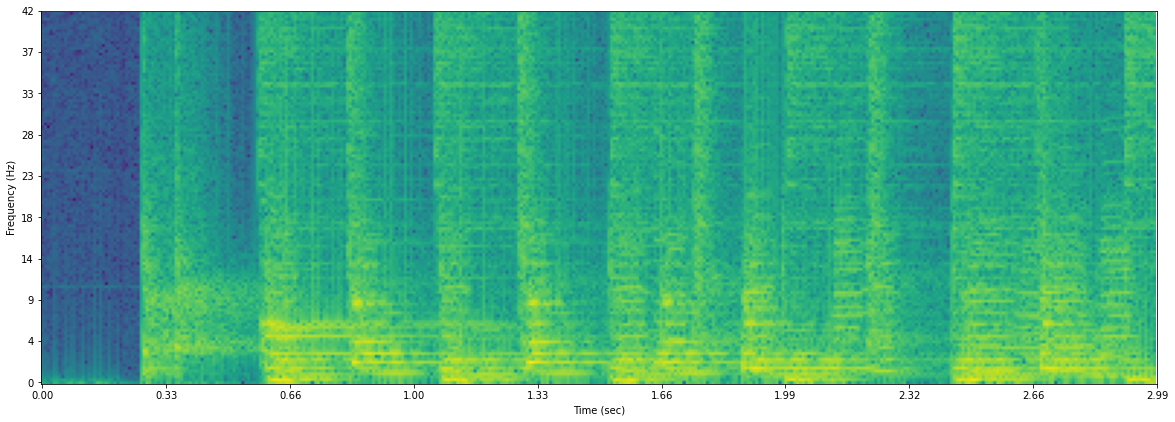

In [14]:
plot_spectrogram(spec,ks,sample_rate,L, starts)